# Import python packages

In [1]:
import pandas as pd
import numpy as np

# Import data

In [2]:
employees = pd.read_csv('employees.csv', na_values='NaN')

# Check data

In [3]:
employees.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,97308,6.945,TRUE,Marketing
1,Thomas,Male,61933,NaN,TRUE,NaN
2,Maria,Female,130590,11.858,FALSE,Finance
3,Jerry,Male,NaN,9.34,TRUE,Finance
4,Larry,Male,101004,1.389,TRUE,Client Services


In [4]:
employees.shape

(1000, 6)

In [5]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   First Name         931 non-null    object
 1   Gender             852 non-null    object
 2   Salary             998 non-null    object
 3   Bonus %            997 non-null    object
 4   Senior Management  932 non-null    object
 5   Team               957 non-null    object
dtypes: object(6)
memory usage: 47.0+ KB


In [6]:
employees.describe()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
count,931,852,998,997,932,957
unique,201,3,993,968,4,13
top,Marilyn,Female,91462,8.999,TRUE,Client Services
freq,11,428,2,3,467,105


# Detect and analyze the missing values

In [7]:
#Nullity (dummy) DataFrame
employees_nullity = employees.isnull()
employees_nullity.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,False,False,False,False,False,False
1,False,False,False,True,False,True
2,False,False,False,False,False,False
3,False,False,True,False,False,False
4,False,False,False,False,False,False


In [8]:
#Total missing values
employees_nullity.sum()

First Name            69
Gender               148
Salary                 2
Bonus %                3
Senior Management     68
Team                  43
dtype: int64

In [9]:
#Percentage of missingness
employees_nullity.mean()*100

First Name            6.9
Gender               14.8
Salary                0.2
Bonus %               0.3
Senior Management     6.8
Team                  4.3
dtype: float64

<AxesSubplot:>

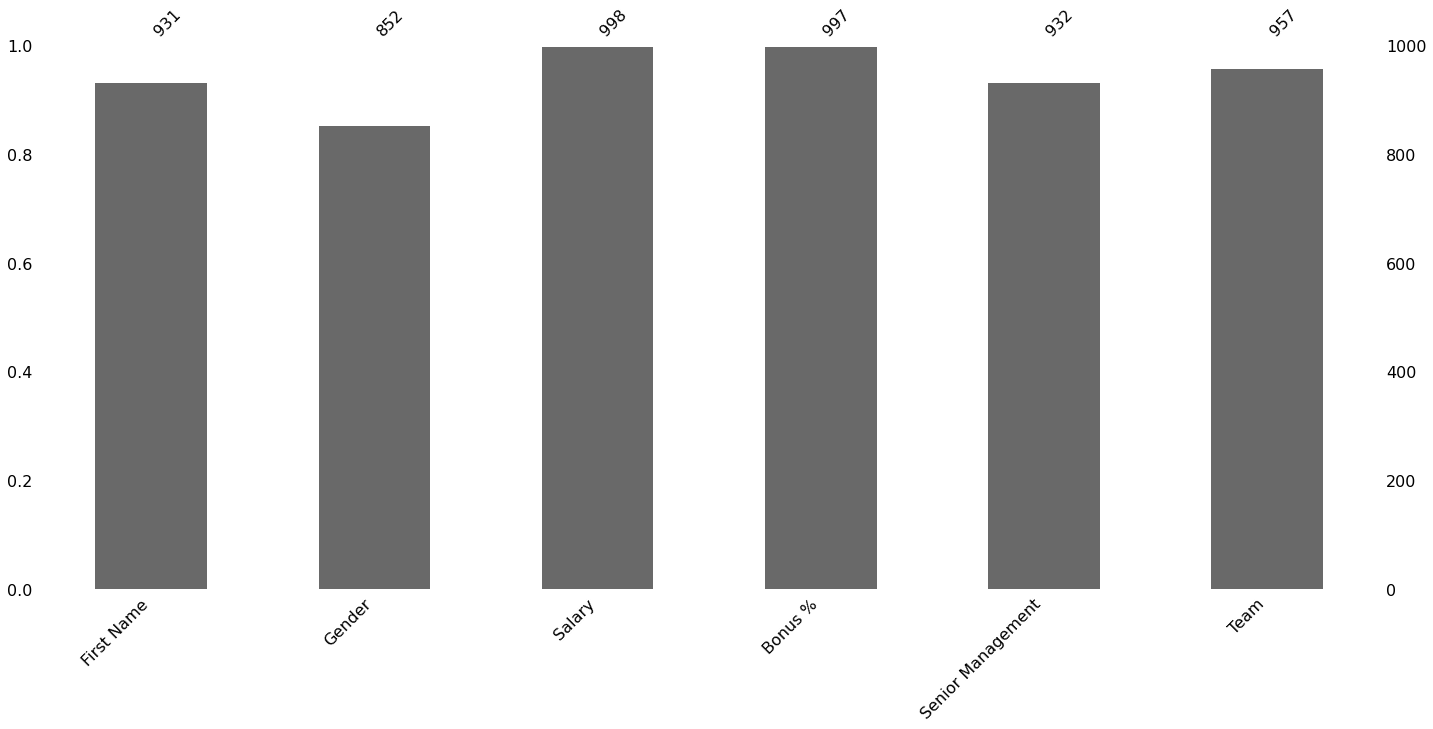

In [10]:
#Nullity Bar using Missingno package (package for graphical analysis of missing values)
import missingno as msno
msno.bar(employees)

<AxesSubplot:>

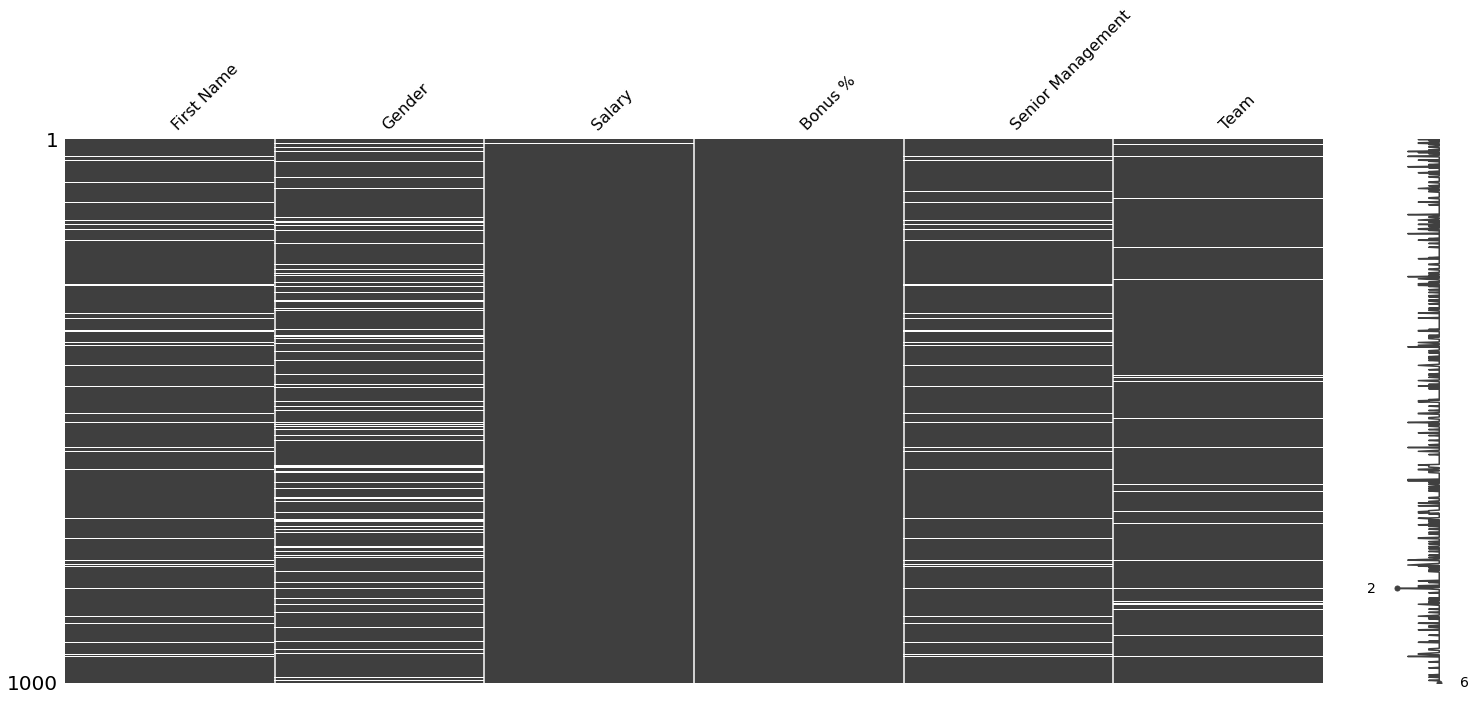

In [11]:
#Nullity Matrix: the plot describes the nullity in the dataset using the white blanks
msno.matrix(employees)
#The 2 on the right is the minimum number of missing values
#6 is the total number of columns

# Finding patterns in missing data

<AxesSubplot:>

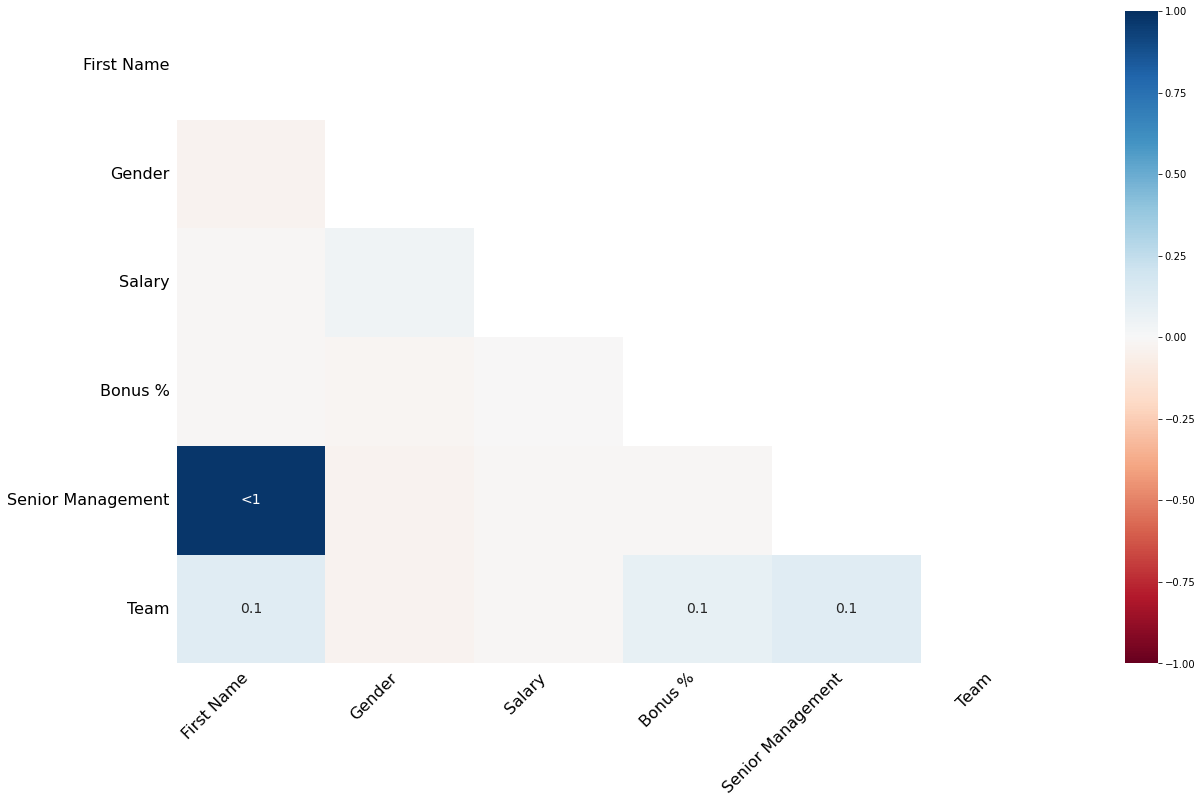

In [12]:
#Missingness Heatmap
#Graph of correlation of missing values between columns
msno.heatmap(employees)

<AxesSubplot:>

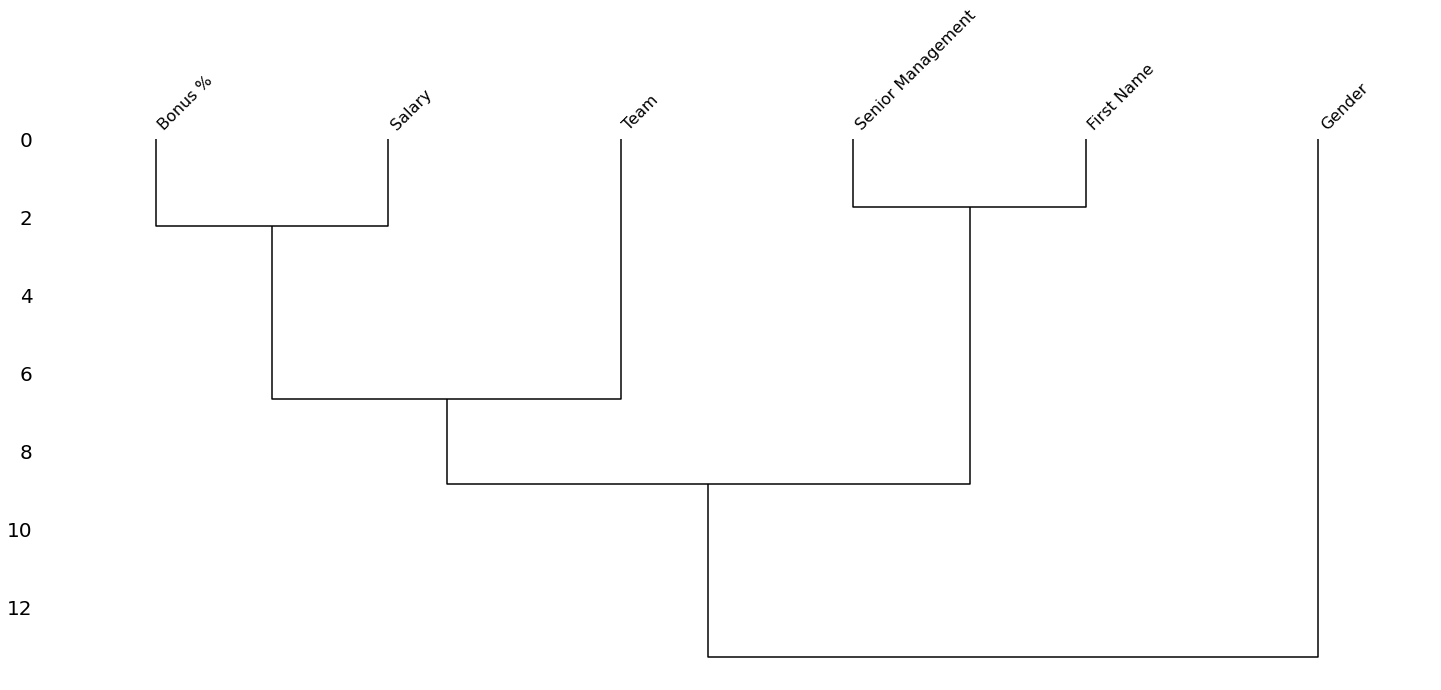

In [13]:
#Missingness Dengrogram: Tree diagram of missingness
#It describes correlation of variables by grouping them
msno.dendrogram(employees)

# Listwise deletion or complete case

In [14]:
employees_delete = employees.copy(deep=True)

In [15]:
print("Number of missing values of the Salary's column:", employees_delete['Salary'].isnull().sum())


Number of missing values of the Salary's column: 2


In [16]:
print("Number of missing values of the Bonus's column:",employees_delete['Bonus %'].isnull().sum())


Number of missing values of the Bonus's column: 3


In [17]:
#Deletion of the Salary's missing values rows
employees_delete.dropna(subset=["Salary"], how='any', inplace=True)

<AxesSubplot:>

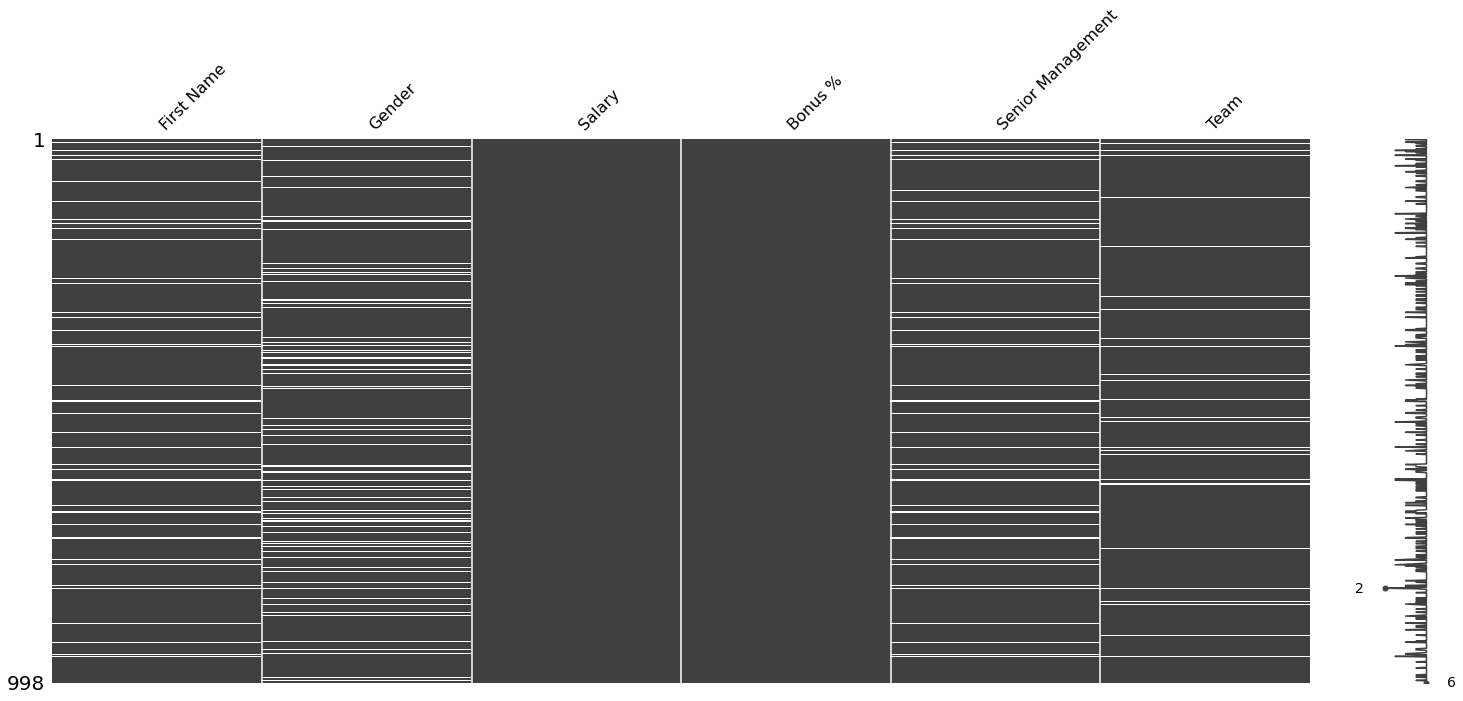

In [18]:
#Now we can visualize that the rows have been deleted
msno.matrix(employees_delete)

<AxesSubplot:>

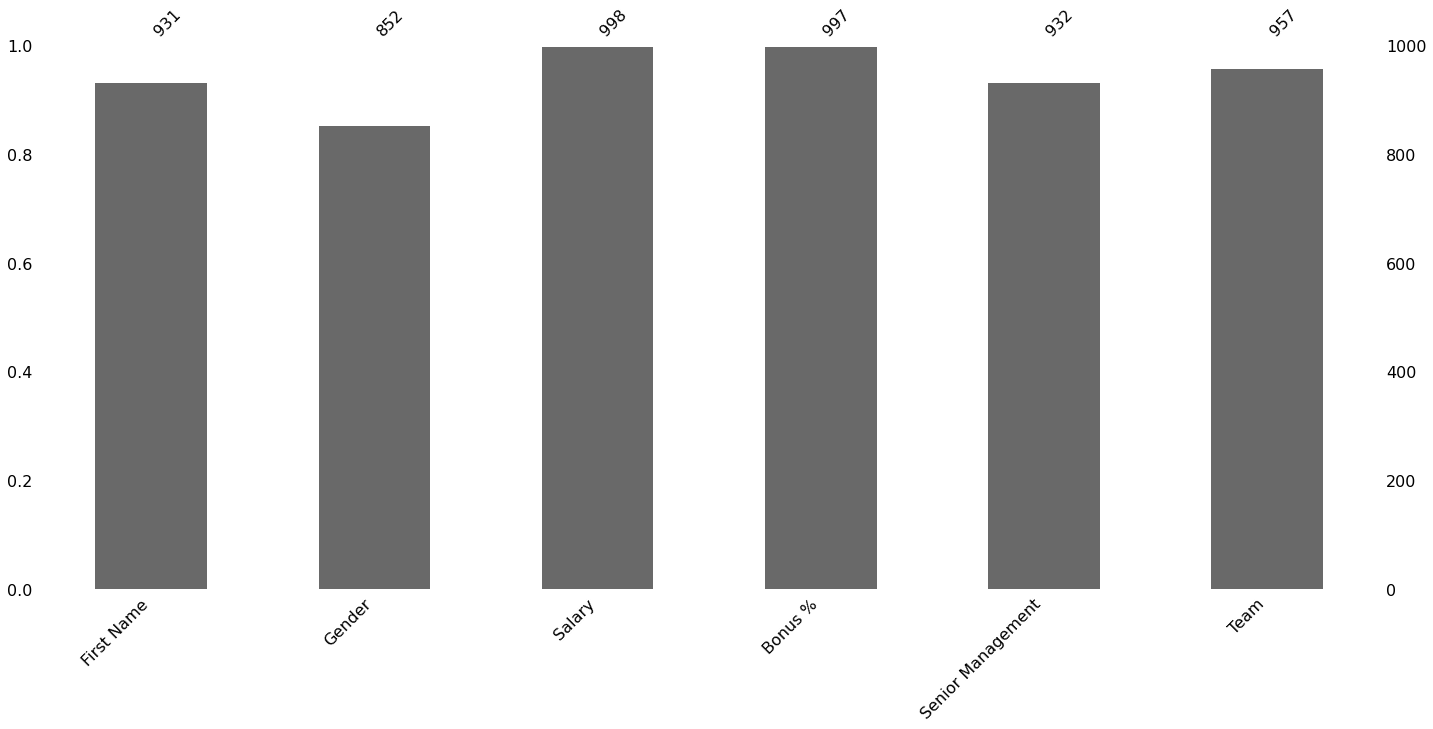

In [19]:
msno.bar(employees)

# Basic Imputation Techniques

## Mean, Median & Mode imputations 

### Mean Imputation 

In [20]:
#Create a copy of the dataset
employees_mean = employees.copy(deep=True)

In [21]:
#Replace all the string values (strings) in Salary and Bonus % with 0 in order to convert them later
employees_mean = employees_mean.replace('n.a.','NaN')
employees_mean = employees_mean.replace('?','NaN')

#Convert the columns from object to float
employees_mean=employees_mean.astype({'Salary':'float', 'Bonus %':'float'})
employees_mean.dtypes


First Name            object
Gender                object
Salary               float64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [22]:
#Check the Salary column
employees_mean.Salary[employees_mean.Salary.isna()]

3     NaN
8     NaN
319   NaN
349   NaN
427   NaN
Name: Salary, dtype: float64

In [23]:
#Check the Bonus % column
employees_mean['Bonus %'][employees_mean['Bonus %'].isna()]

1    NaN
14   NaN
47   NaN
75   NaN
Name: Bonus %, dtype: float64

In [24]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')

#Before the imputation
print('Before the imputation:')
employees_mean.iloc[:, 2:4].head()


Before the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,NaN
2,130590.0,11.858
3,NaN,9.340
4,101004.0,1.389


In [25]:
print('After the imputation:')
emp_sal_bon = employees_mean[['Salary','Bonus %']]
employees_mean.iloc[:, 2:4] = mean_imputer.fit_transform(emp_sal_bon)
employees_mean.iloc[:, 2:4].head()

After the imputation:


,Salary,Bonus %
0,97308.000000,6.945000
1,61933.000000,10.215586
2,130590.000000,11.858000
3,90522.329648,9.340000
4,101004.000000,1.389000


### Median Imputation 

In [26]:
#Create a copy of the dataset
employees_median = employees.copy(deep=True)

In [27]:
#Replace all the string values (strings) in Salary and Bonus % with 0 in order to convert them later
employees_median = employees_median.replace('n.a.','NaN')
employees_median = employees_median.replace('?','NaN')

#Convert the columns from object to float
employees_median=employees_median.astype({'Salary':'float', 'Bonus %':'float'})
employees_median.dtypes


First Name            object
Gender                object
Salary               float64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [28]:
#Before the imputation
print('Before the imputation:')
employees_median.iloc[:, 2:4].head()

Before the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,NaN
2,130590.0,11.858
3,NaN,9.340
4,101004.0,1.389


In [29]:
print('After the imputation:')
median_imputer = SimpleImputer(strategy='median')
emp_sal_bon = employees_median[['Salary','Bonus %']]
employees_median.iloc[:, 2:4] = median_imputer.fit_transform(emp_sal_bon)
employees_median.iloc[:, 2:4].head()

After the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,9.850
2,130590.0,11.858
3,90370.0,9.340
4,101004.0,1.389


### Mode Imputation 

In [30]:
#Create a copy of the dataset
employees_mode = employees.copy(deep=True)

In [31]:
#Replace all the string values (strings) in Salary and Bonus % with 0 in order to convert them later
employees_mode = employees_mode.replace('n.a.','NaN')
employees_mode = employees_mode.replace('?','NaN')

#Convert the columns from object to float
employees_mode=employees_mode.astype({'Salary':'float', 'Bonus %':'float'})
employees_mode.dtypes


First Name            object
Gender                object
Salary               float64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [32]:
#Before the imputation
print('Before the imputation:')
employees_mode.iloc[:, 2:4].head()

Before the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,NaN
2,130590.0,11.858
3,NaN,9.340
4,101004.0,1.389


In [33]:
print('After the imputation:')
mode_imputer = SimpleImputer(strategy='most_frequent')
emp_sal_bon = employees_mode[['Salary','Bonus %']]
employees_mode.iloc[:, 2:4] = mode_imputer.fit_transform(emp_sal_bon)
employees_mode.iloc[:, 2:4].head()

After the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,8.999
2,130590.0,11.858
3,86676.0,9.340
4,101004.0,1.389


In [58]:
employees_mode.isnull().sum()

First Name            69
Gender               148
Salary                 0
Bonus %                0
Senior Management     68
Team                  43
dtype: int64

### Constant Imputation 

In [34]:
#Create a copy of the dataset
employees_constant = employees.copy(deep=True)

In [35]:
#Replace all the string values (strings) in Salary and Bonus % with 0 in order to convert them later
employees_constant = employees_constant.replace('n.a.','NaN')
employees_constant = employees_constant.replace('?','NaN')

#Convert the columns from object to float
employees_constant=employees_constant.astype({'Salary':'float', 'Bonus %':'float'})
employees_constant.dtypes


First Name            object
Gender                object
Salary               float64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [36]:
#Before the imputation
print('Before the imputation:')
employees_constant.iloc[:, 2:4].head()

Before the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,NaN
2,130590.0,11.858
3,NaN,9.340
4,101004.0,1.389


In [37]:
print('After the imputation:')
constant_imputer = SimpleImputer(strategy='constant', fill_value=0)
emp_sal_bon = employees_constant[['Salary','Bonus %']]
employees_constant.iloc[:, 2:4] = constant_imputer.fit_transform(emp_sal_bon)
employees_constant.iloc[:, 2:4].head()

After the imputation:


,Salary,Bonus %
0,97308.0,6.945
1,61933.0,0.000
2,130590.0,11.858
3,0.0,9.340
4,101004.0,1.389


In [57]:
employees_constant.isnull().sum()

First Name            69
Gender               148
Salary                 0
Bonus %                0
Senior Management     68
Team                  43
dtype: int64

# Advanced Imputation Techniques

## K-Nearest Neighbor Imputation

## On numerical columns (Salary and Bonus)

In [52]:
employees_knn = employees.copy(deep=True)
#Replace all the string values in Salary and Bonus % with 0 in order to convert them to float
employees_knn = employees_knn.replace('n.a.','NaN')
employees_knn = employees_knn.replace('?','NaN')

#Convert the columns from object to float
employees_knn=employees_knn.astype({'Salary':'float', 'Bonus %':'float'})
employees_knn.dtypes

First Name            object
Gender                object
Salary               float64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [53]:
employees_knn[['Salary','Bonus %']].head()

,Salary,Bonus %
0,97308.0,6.945
1,61933.0,NaN
2,130590.0,11.858
3,NaN,9.340
4,101004.0,1.389


In [54]:
from fancyimpute import KNN
knn_imputer = KNN()
emp_sal_bon = employees_knn[['Salary','Bonus %']]
employees_knn.iloc[:,2:4] = knn_imputer.fit_transform(emp_sal_bon)

Imputing row 1/1000 with 0 missing, elapsed time: 0.116
Imputing row 101/1000 with 0 missing, elapsed time: 0.117
Imputing row 201/1000 with 0 missing, elapsed time: 0.117
Imputing row 301/1000 with 0 missing, elapsed time: 0.117
Imputing row 401/1000 with 0 missing, elapsed time: 0.117
Imputing row 501/1000 with 0 missing, elapsed time: 0.118
Imputing row 601/1000 with 0 missing, elapsed time: 0.118
Imputing row 701/1000 with 0 missing, elapsed time: 0.118
Imputing row 801/1000 with 0 missing, elapsed time: 0.118
Imputing row 901/1000 with 0 missing, elapsed time: 0.119


In [55]:
employees_knn[['Salary','Bonus %']].head()

,Salary,Bonus %
0,97308.000000,6.945000
1,61933.000000,8.218788
2,130590.000000,11.858000
3,90439.585034,9.340000
4,101004.000000,1.389000


In [56]:
employees_knn.isnull().sum()

First Name            69
Gender               148
Salary                 0
Bonus %                0
Senior Management     68
Team                  43
dtype: int64

## On categorical columns 

### Step 1: Convert non-missing categorical columns to ordinal values

In [105]:
from sklearn.preprocessing import OrdinalEncoder

In [106]:
#Create dictionary for Ordinal encoders
ordinal_enc_dict = {}

#Loop over columns to encode
for col_name in employees_knn:
    
    #Create ordinal encoder for the column    
    ordinal_enc_dict[col_name] = OrdinalEncoder() #To create a unique encoder for each column and store them in the dictionary (this will help to later convert them back to their respective categories )
    col = employees_knn[col_name]
    
    #Select the non-null values in the column   
    col_not_null = col[col.notnull()]   
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    
    #Encode the non-null values of the column  
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    #Replace the values in the column with ordinal values 
    employees_knn.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)


In [107]:
employees_knn.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,55.0,1.0,564.0,316.0,2.0,7.0
1,190.0,1.0,244.0,386.0,2.0,NaN
2,130.0,0.0,846.0,582.0,0.0,4.0
3,90.0,1.0,501.0,448.0,2.0,4.0
4,119.0,1.0,599.0,16.0,2.0,1.0


### Step 2: Impute the missing values in the ordinal DataFrame

In [108]:
#Impute the dataframe
employees_knn_imputed = employees_knn.copy(deep=True)

#Create KNN imputer
KNN_imputer = KNN() 

#Round the values, as the imputed values need to be whole numbers not decimal
employees_knn_imputed.iloc[:, :] = np.round(KNN_imputer.fit_transform(employees_knn_imputed))

Imputing row 1/1000 with 0 missing, elapsed time: 0.131
Imputing row 101/1000 with 0 missing, elapsed time: 0.133
Imputing row 201/1000 with 0 missing, elapsed time: 0.134
Imputing row 301/1000 with 0 missing, elapsed time: 0.135
Imputing row 401/1000 with 1 missing, elapsed time: 0.136
Imputing row 501/1000 with 0 missing, elapsed time: 0.137
Imputing row 601/1000 with 1 missing, elapsed time: 0.137
Imputing row 701/1000 with 0 missing, elapsed time: 0.139
Imputing row 801/1000 with 0 missing, elapsed time: 0.140
Imputing row 901/1000 with 0 missing, elapsed time: 0.141


### Step 3: Convert back from ordinal values to categorical values

In [109]:
#Convert back the ordinal values to thair labels
for col in employees_knn_imputed:
    reshaped_col = employees_knn_imputed[col].values.reshape(-1, 1)
    employees_knn_imputed[col] = ordinal_enc_dict[col].inverse_transform(reshaped_col)

In [110]:
employees_knn_imputed.head()

,First Name,Gender,Salary,Bonus %,Senior Management,Team
0,55.0,1.0,564.0,316.0,2.0,7.0
1,190.0,1.0,244.0,386.0,2.0,3.0
2,130.0,0.0,846.0,582.0,0.0,4.0
3,90.0,1.0,501.0,448.0,2.0,4.0
4,119.0,1.0,599.0,16.0,2.0,1.0


In [111]:
employees_knn_imputed.isnull().sum()

First Name           0
Gender               0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64

C:\Users\Marah Baccari\anaconda3\lib\site-packages\missingno\missingno.py:72: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax0.grid(b=False)
C:\Users\Marah Baccari\anaconda3\lib\site-packages\missingno\missingno.py:141: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax1.grid(b=False)


<AxesSubplot:>

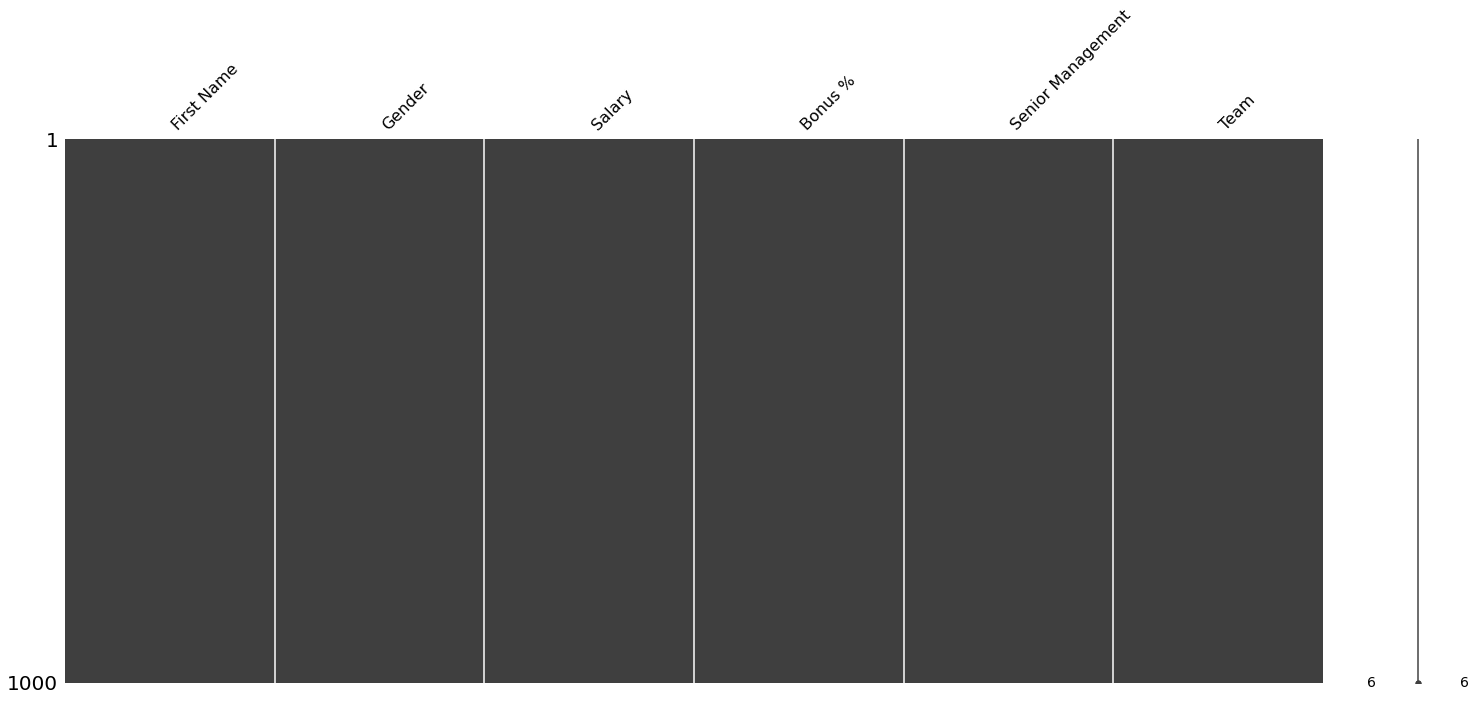

In [112]:
msno.matrix(employees_knn_imputed)

<AxesSubplot:>

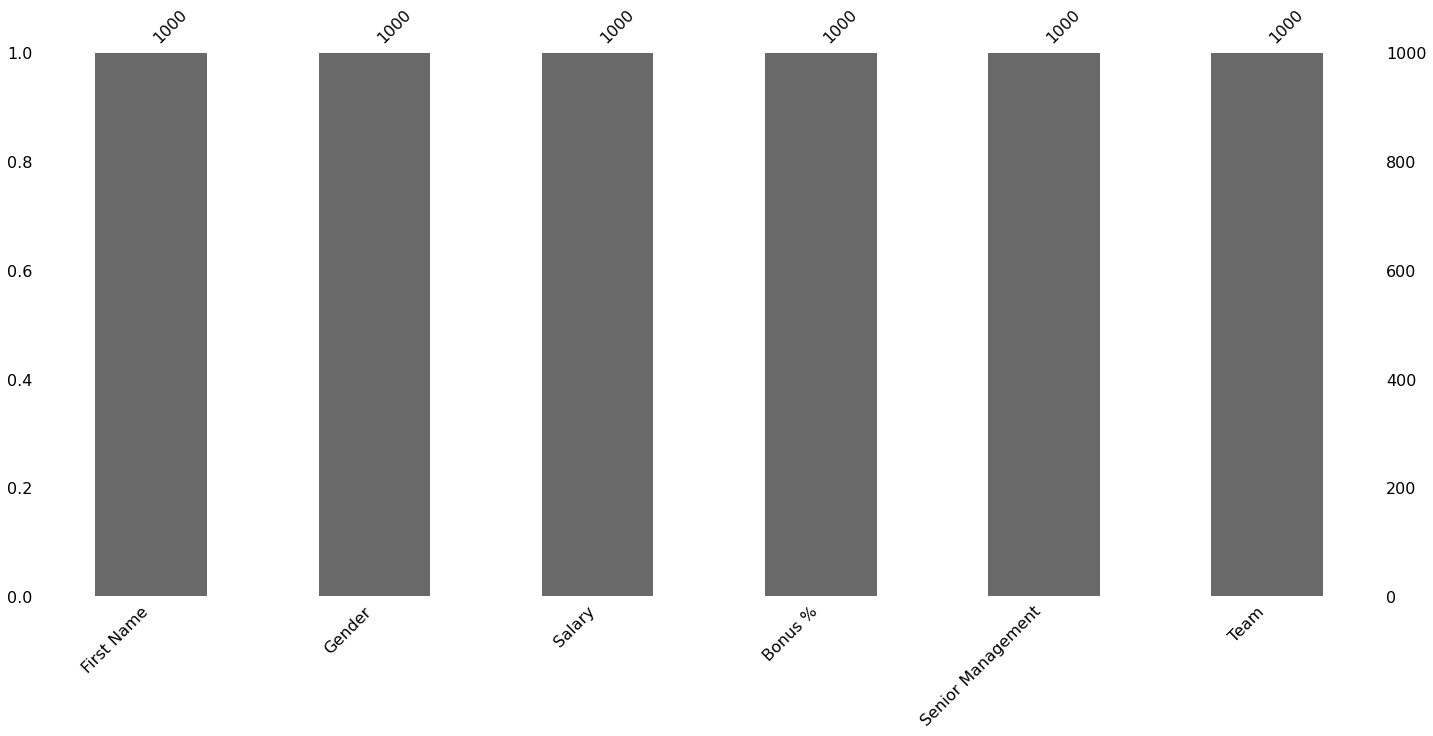

In [113]:
msno.bar(employees_knn_imputed)